<a href="https://colab.research.google.com/github/Esther-Zhou99/Data-Science/blob/main/BAIT509_Project_Skeleton_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project**, BAIT509 Winter 2023
**Business Applications of Machine Learning [100 Marks]**

**Deadline: Thursday, February 9th @ 11:59pm**

**Academic Integrity**

This is a group project. Do not share your code with other groups, or post any parts of your work online. You can only submit code that is produced by your group. If you use any online resource for developing parts of your code, you must explicitly acknowledge the source in a comment in your code. Students suspected of plagiarism on the project will be referred to the university for formal discipline according to the regulations.

**Please note that late submissions receive a mark of 0 as per course outline and RHL regulations.**

Please fill out the following:

• Full Names of all Group members: **Linghan Zhou, Cindy Zhang, Fanting Qi**


• Student Numbers of all Group member: **61758959, 80767965, 93217750**


• Group number (from Canvas): **Group 28**


**Two submission files are required per group:**

For submitting this project, two files must be submitted on Canvas by the project deadline:

1) The complete Jupyter file (in .ipynb format) (that completely compiles on Google colab without any errors independent of the computer used.)

2) A self-contained and complete pdf printout of the same Jupyter file with all the output printed as well as all the code, text cells, comments, and figures.

**Policy regarding the use of AI assistant tools**

If you use ChatGPT (or a similar tool) to get ideas and/or partial answers for this project or to generate any text, you must declare that you have used it, with a couple sentences describing the extent to which it was used, and you must save any generated text from this tool in case it is requested.

You will not be penalized for using such AI assistant tools, but the TA or the instructor may ask you to provide the generated text in order to help with grading decisions. In this case, your (or your group's) original contributions will be evaluated. Failure to fully declare the use of this tool will be considered "unauthorized" (See 3.b of the [Vancouver Academic Calendar](https://www.calendar.ubc.ca/vancouver/index.cfm?tree=3,54,111,1745))

## **Part 0: Loading the libraries and the data [0 Marks]**


In this project, we want to develop a statistical model for the mortality rate of lung cancer in the United States.

One of the parts overlooked in many machine learning projects is preprocessing. And a good way to learn it is by solving a lot of examples and test cases. A big part of this project is walking you through preprocessing, making informed decisions using your observations, and exploratory data analysis. Then we use supervised learning methods to construct models to predict the mortality rate of lung cancer using the features provided here.

In [35]:
# data wrangling tools
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# statistical learning
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Loading data
Load the three csv files as pandas dataframes directly from their URLs.

In [36]:
fulldf = pd.read_csv('https://saref.github.io/teaching/BAIT509/mydata.csv').drop(columns='Unnamed: 0')
data_dict = pd.read_csv('https://saref.github.io/teaching/BAIT509/descriptions.csv')
populationdf = pd.read_csv('https://saref.github.io/teaching/BAIT509/populations.csv').drop(columns='Unnamed: 0')

Data set `mydata.csv` includes most of the data. Explanations on the meaning of each of the columns are included in `descriptions.csv`. Please take your time to understand the three dataframes before proceeding.

## **Part 1: Getting started [40 Marks]**

## Data cleaning
In this project, we go through specific data cleaning steps. Please read through the instructions carefully.


### 1.1 Convert `FIPS` column to correct format [5 Marks]
Federal Information Processing Standard or [FIPS](https://en.wikipedia.org/wiki/FIPS_county_code) is a categorical variable. It is a code with five digits. The left two digits showing the state and the three right digits showing the county code. We recognize that desipite being a number, FIPS is actually a categorical variable.
First, check the format of the `FIPS` column and convert them to the five digit format with type `np.object_` as seen in the county level section, [here](https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt#:~:text=county%2Dlevel%20%20%20%20%20%20place). 

*Hint*: You can use [apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) to first convert the type and then use [`str.pad`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.pad.html) to format the values as five digit numbers.

In [37]:
fulldf.head()

,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,...,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Recent_Trend,Mortality_Rate,Avg_Ann_Deaths
0,AK,"Aleutians East Borough, Alaska",553,334,219,2013,61518.0,72639.0,31250.0,54750.0,...,1317,566,540,1442,1857,*,3 or fewer,*,*,*
1,AK,"Aleutians West Census Area, Alaska",499,273,226,2016,84306.0,97321.0,93750.0,48750.0,...,769,1707,564,4177,1333,*,3 or fewer,*,*,*
2,AK,"Anchorage Municipality, Alaska",23914,10698,13216,2020,78326.0,87235.0,50535.0,53935.0,...,23245,122426,21393,243173,44638,61.5,131,stable,47.3,96
3,AK,"Bethel Census Area, Alaska",4364,2199,2165,2050,51012.0,92647.0,73661.0,41594.0,...,2708,6627,1774,13023,4482,62.7,6,stable,58.3,5
4,AK,"Bristol Bay Borough, Alaska",69,33,36,2060,79750.0,88000.0,NaN,63333.0,...,124,349,67,768,191,*,3 or fewer,*,*,*


In [38]:
# Check the format of the FIPS column
print(fulldf["FIPS"].dtype)

int64


In [39]:
# Convert the integer type to string
fulldf["FIPS"]= fulldf["FIPS"].astype(str) 
# Format the values as five digit numbers by filling with "0"
fulldf["FIPS"]= fulldf["FIPS"].str.pad(width=5, side="left", fillchar="0")
# Convert the type to object.
fulldf["FIPS"]= fulldf["FIPS"].astype(np.object) 

<ipython-input-39-1f9dc79447e3>:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fulldf["FIPS"]= fulldf["FIPS"].astype(np.object)


In [40]:
fulldf.head()

,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,...,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Recent_Trend,Mortality_Rate,Avg_Ann_Deaths
0,AK,"Aleutians East Borough, Alaska",553,334,219,02013,61518.0,72639.0,31250.0,54750.0,...,1317,566,540,1442,1857,*,3 or fewer,*,*,*
1,AK,"Aleutians West Census Area, Alaska",499,273,226,02016,84306.0,97321.0,93750.0,48750.0,...,769,1707,564,4177,1333,*,3 or fewer,*,*,*
2,AK,"Anchorage Municipality, Alaska",23914,10698,13216,02020,78326.0,87235.0,50535.0,53935.0,...,23245,122426,21393,243173,44638,61.5,131,stable,47.3,96
3,AK,"Bethel Census Area, Alaska",4364,2199,2165,02050,51012.0,92647.0,73661.0,41594.0,...,2708,6627,1774,13023,4482,62.7,6,stable,58.3,5
4,AK,"Bristol Bay Borough, Alaska",69,33,36,02060,79750.0,88000.0,NaN,63333.0,...,124,349,67,768,191,*,3 or fewer,*,*,*


In [41]:
# Check the format of the FIPS column again to validate
print(fulldf["FIPS"].dtype)

object


### 1.2 Check for null values [5 Marks]

Just check for null values and remove columns whenever the percentage of null values is greater than 20. Please briefly justify your choices w.r.t. the columns you have removed.

In [42]:
# Calculate the total cells of a column
total_cells =  fulldf.shape[0]
# Calculate the total null values 
total_missing = fulldf.isnull().sum()
# Calculate the percentage of null values 
percent_missing = (total_missing/total_cells) * 100
# Create a new dataframe df1 to keep the columns that have a percentage of null values less than 20% 
df1 = fulldf.loc[:, percent_missing <= 20]
# Check the shape of fulldf and df1
print(fulldf.shape)
print(df1.shape)

(3134, 23)
(3134, 19)


In [43]:
# List the column names that we have decided to remove
df_drop = fulldf.loc[:, percent_missing > 20]
print(list(df_drop.columns))

['Med_Income_Black', 'Med_Income_Nat_Am', 'Med_Income_Asian', 'Med_Income_Hispanic']


The reasoning behind removing columns with more than 20% missing values is that a large amount of missing data in these columns will significantly impact the accuracy and validity of the predictions. By removing these columns, the data will be cleaner and more reliable.
The removed columns are "**Med_Income_Black**", "**Med_Income_Nat_Am**", "**Med_Income_Asian**", and "**Med_Income_Hispanic**".

### 1.3 Check the format of columns [5 Marks]
Report the format of each column. List the columns that are in an unexpected format and state why you think that is the case.

*Hint*: You can do this by either inspecting the dataframe or by writing a code snippet that tells you what cells cannot be reformatted to the correct format. The Titatinc Jupyter file that we covered in class may also give you some useful ideas.

In [44]:
# Check the format of columns
df1.dtypes

State                 object
AreaName              object
All_Poverty            int64
M_Poverty              int64
F_Poverty              int64
FIPS                  object
Med_Income           float64
Med_Income_White     float64
M_With                 int64
M_Without              int64
F_With                 int64
F_Without              int64
All_With               int64
All_Without            int64
Incidence_Rate        object
Avg_Ann_Incidence     object
Recent_Trend          object
Mortality_Rate        object
Avg_Ann_Deaths        object
dtype: object

The columns that are in an unexpected format are "**Incidence_Rate**", "**Avg_Ann_Incidence**", "**Mortality_Rate**", and "**Avg_Ann_Deaths**". </br>
These columns contain numerical values, but are stored as objects. The reason they are stored as objects is because the data may contain non-numeric characters, such as commas, dollar signs, or percentage signs, which cannot be stored as numerical data types.

### 1.4 Merge the population data to the main dataframe [5 Marks]
You already know about FIPS. You can use the state and county columns in this dataset to construct a FIPS column in the population dataframe in the same format as the main dataframe. Then merge the population data to the main dataframe. It is up to you to decide the type of merge and whether it is done properly.

In [45]:
# Check the populationdf
populationdf.head()

,POPESTIMATE2015,STATE,COUNTY
0,4858979,1,0
1,55347,1,1
2,203709,1,3
3,26489,1,5
4,22583,1,7


In [46]:
# Change the type of columns "STATE" and "COUNTY" to string
populationdf["STATE"]= populationdf["STATE"].astype(str) 
populationdf["COUNTY"]= populationdf["COUNTY"].astype(str) 
# Format the values of "STATE" as two digit numbers and the values of "COUNTY" as three digit numbers by filling with "0"
populationdf["STATE"]= populationdf["STATE"].str.pad(width=2, side="left", fillchar="0")
populationdf["COUNTY"]= populationdf["COUNTY"].str.pad(width=3, side="left", fillchar="0")
# Merge the "STATE" AND "COUNTY" columns into one column and rename the new column as "FIPS"
populationdf["FIPS"] = populationdf["STATE"] + populationdf["COUNTY"]
# Convert the type to object.
populationdf["FIPS"]= populationdf["FIPS"].astype(np.object) 

<ipython-input-46-6e5536ca9dfb>:10: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  populationdf["FIPS"]= populationdf["FIPS"].astype(np.object)


In [47]:
populationdf.head()

,POPESTIMATE2015,STATE,COUNTY,FIPS
0,4858979,01,000,01000
1,55347,01,001,01001
2,203709,01,003,01003
3,26489,01,005,01005
4,22583,01,007,01007


In [48]:
# Use the function of merge to combine the two dataframe
df2 = df1.merge(populationdf)
df2.head()

,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,M_With,M_Without,...,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Recent_Trend,Mortality_Rate,Avg_Ann_Deaths,POPESTIMATE2015,STATE,COUNTY
0,AK,"Aleutians East Borough, Alaska",553,334,219,02013,61518.0,72639.0,876,1317,...,1442,1857,*,3 or fewer,*,*,*,3341,02,013
1,AK,"Aleutians West Census Area, Alaska",499,273,226,02016,84306.0,97321.0,2470,769,...,4177,1333,*,3 or fewer,*,*,*,5702,02,016
2,AK,"Anchorage Municipality, Alaska",23914,10698,13216,02020,78326.0,87235.0,120747,23245,...,243173,44638,61.5,131,stable,47.3,96,298695,02,020
3,AK,"Bethel Census Area, Alaska",4364,2199,2165,02050,51012.0,92647.0,6396,2708,...,13023,4482,62.7,6,stable,58.3,5,17946,02,050
4,AK,"Bristol Bay Borough, Alaska",69,33,36,02060,79750.0,88000.0,419,124,...,768,191,*,3 or fewer,*,*,*,892,02,060


### 1.5 Cleaning the output (response) column `Mortality_Rate` [10 Marks]
Using the file `descriptions.csv`, explain what the non-numerical values of `Mortality_Rate` mean. 

Then, it is decision making time, we have to decide whether to remove the non-numerical values from `Mortality_Rate` or to assign a specific numerical value to them. This decision is based on you inferring if the non-numerical values were caused by error in data gathering or not. 

Note that if the observations are valid and are deleted, we are adding a bias to the model.

*Hint*: To get the full mark for this part, conduct multiple relevant exploratory data analyses. Then use them to support your decision on removing or modifying the non-numerical values. Your choice results in full mark if the supporting analysis and arguments are deemed adequate and convincing.

In [49]:
# Check the data in the column "Mortality_Rate"
df2["Mortality_Rate"]

0          *
1          *
2       47.3
3       58.3
4          *
        ... 
3129    28.4
3130    29.1
3131    22.1
3132    38.2
3133    43.5
Name: Mortality_Rate, Length: 3134, dtype: object

In [50]:
# delete all rows with '*' in the desired column 
df3 = df2[df2["Mortality_Rate"] != "*"] 
df3["Mortality_Rate"]

2       47.3
3       58.3
7         54
9       34.4
10      50.1
        ... 
3129    28.4
3130    29.1
3131    22.1
3132    38.2
3133    43.5
Name: Mortality_Rate, Length: 2809, dtype: object

We decide to remove all rows with '*' in the desired column for a more accurate estimation, as the proportion of these values is small, removing them will not significantly impact the sample size.

### 1.6 Reformat the rest of the columns specified in 1.3 to numerical [5 Marks]
In each column reformat all the cells that you can. 

*Hint*: You can keep the cells that you cannot reformat until you decide if you want to use the specific column in the model. This is because you want to lose as least data as possible. So you can drop the associated rows if you want to use the column and keep them if the specific column is not used.

In [51]:
## Incidence_Rate
# Remove all the unexpected value from the column
df3['Incidence_Rate'] = df3['Incidence_Rate'].str.replace(' ', '') 
df3['Incidence_Rate'] = df3['Incidence_Rate'].str.replace('__','') 
df3['Incidence_Rate'] = df3['Incidence_Rate'].str.replace('*', '') 
df3['Incidence_Rate'] = df3['Incidence_Rate'].str.replace('_', '') 
df3['Incidence_Rate'] = df3['Incidence_Rate'].str.replace('#', '') 
# Change the type of Incidence_Rate from object to numerical format
df3['Incidence_Rate']  = pd.to_numeric(df3['Incidence_Rate'], errors='coerce')
# Check the total number of null value
df3['Incidence_Rate'].isnull().sum()

<ipython-input-51-26aed64e241a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Incidence_Rate'] = df3['Incidence_Rate'].str.replace(' ', '')
<ipython-input-51-26aed64e241a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Incidence_Rate'] = df3['Incidence_Rate'].str.replace('__','')
<ipython-input-51-26aed64e241a>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal stri

168

In [52]:
## Avg_Ann_Incidence
# Remove all the unexpected value from the column
df3['Avg_Ann_Incidence'] = df3['Avg_Ann_Incidence'].str.replace(' ', '') 
df3['Avg_Ann_Incidence'] = df3['Avg_Ann_Incidence'].str.replace('__','') 
df3['Avg_Ann_Incidence'] = df3['Avg_Ann_Incidence'].str.replace('_', '') 
df3['Avg_Ann_Incidence'] = df3['Avg_Ann_Incidence'].str.replace('3 or fewer','')
# Change the type of Incidence_Rate from object to numerical format
df3['Avg_Ann_Incidence']  = pd.to_numeric(df3['Avg_Ann_Incidence'], errors='coerce')
# Check the total number of null value
df3['Avg_Ann_Incidence'].isnull().sum()

<ipython-input-52-12a070fe83b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Avg_Ann_Incidence'] = df3['Avg_Ann_Incidence'].str.replace(' ', '')
<ipython-input-52-12a070fe83b9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Avg_Ann_Incidence'] = df3['Avg_Ann_Incidence'].str.replace('__','')
<ipython-input-52-12a070fe83b9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

168

In [53]:
## Mortality_Rate
#  Change the type of Incidence_Rate from object to numerical format
df3['Mortality_Rate'] = df3['Mortality_Rate'].astype(float)
# Check the total number of null value
df3['Mortality_Rate'].isnull().sum() 

<ipython-input-53-3cfdd0e107de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Mortality_Rate'] = df3['Mortality_Rate'].astype(float)


0

In [54]:
## Avg_Ann_Deaths
#  Change the type of Incidence_Rate from object to numerical format
df3['Avg_Ann_Deaths'] = df3['Avg_Ann_Deaths'].str.replace('*', '') 
df3['Avg_Ann_Deaths'] = df3['Avg_Ann_Deaths'].str.replace(',', '') 
df3['Avg_Ann_Deaths'] = df3['Avg_Ann_Deaths'].astype(float) 
# Check the total number of null value
df3['Avg_Ann_Deaths'].isnull().sum() 

<ipython-input-54-fd3f4bc9b1fb>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df3['Avg_Ann_Deaths'] = df3['Avg_Ann_Deaths'].str.replace('*', '')
<ipython-input-54-fd3f4bc9b1fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Avg_Ann_Deaths'] = df3['Avg_Ann_Deaths'].str.replace('*', '')
<ipython-input-54-fd3f4bc9b1fb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

0

In [55]:
# Drop the rows that contain null values in the columns "Incidence_Rate" and  "Avg_Ann_Incidence"
df4 = df3.dropna(subset=["Incidence_Rate", "Avg_Ann_Incidence"])
df4.shape

(2641, 22)

### 1.7 Make the numerical data useful [5 Marks]
We know we have many columns of data, some of them are dependent on the populations. As a *Hint*, convert all the raw data to per 100,000 persons rates (divide by population and multiply by 100,000).

In [56]:
# Select the columns that are dependent on the populations
col_pop = ["All_Poverty", "All_With", "All_Without", "Avg_Ann_Incidence", "Avg_Ann_Deaths" ] 

# Convert the raw data to per 100,000 persons rates
for col in col_pop:
    df4[col] = df4[col] / df4["POPESTIMATE2015"] * 100000

<ipython-input-56-55a7867ccb98>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4[col] = df4[col] / df4["POPESTIMATE2015"] * 100000


In [57]:
df4.head()

,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,M_With,M_Without,...,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,Recent_Trend,Mortality_Rate,Avg_Ann_Deaths,POPESTIMATE2015,STATE,COUNTY
2,AK,"Anchorage Municipality, Alaska",8006.160130,10698,13216,02020,78326.0,87235.0,120747,23245,...,81411.808032,14944.341218,61.5,43.857447,stable,47.3,32.139808,298695,02,020
3,AK,"Bethel Census Area, Alaska",24317.396634,2199,2165,02050,51012.0,92647.0,6396,2708,...,72567.703109,24974.924774,62.7,33.433634,stable,58.3,27.861362,17946,02,050
7,AK,"Fairbanks North Star Borough, Alaska",7780.710823,3523,4229,02090,71068.0,74242.0,40605,6957,...,81114.311811,12324.477321,58.1,36.133332,stable,54.0,31.114814,99631,02,090
9,AK,"Juneau City and Borough, Alaska",6441.567957,1145,965,02110,85746.0,90553.0,13739,2433,...,83407.619978,14183.661009,35.1,27.475882,stable,34.4,24.423006,32756,02,110
10,AK,"Kenai Peninsula Borough, Alaska",9573.020548,2596,2962,02122,63684.0,64663.0,22391,6435,...,75886.598116,20441.275254,64.9,67.173048,stable,50.1,48.226804,58059,02,122


## **Part 2: Exploratory analysis [15 Marks]**

### 2.1 Visualizing different features [5 Marks]
Here, show different feature and how they change with respect to each other.
*Hint*: A good function to use here is `sns.pairplot`. Remember to have the plots labeled properly so that they are self explanatory.


In [58]:
print(list(df4.columns))

['State', 'AreaName', 'All_Poverty', 'M_Poverty', 'F_Poverty', 'FIPS', 'Med_Income', 'Med_Income_White', 'M_With', 'M_Without', 'F_With', 'F_Without', 'All_With', 'All_Without', 'Incidence_Rate', 'Avg_Ann_Incidence', 'Recent_Trend', 'Mortality_Rate', 'Avg_Ann_Deaths', 'POPESTIMATE2015', 'STATE', 'COUNTY']


In [59]:
x_variable = df4[['All_Poverty', 'M_Poverty', 'F_Poverty', 'Med_Income', 'Med_Income_White', 'M_With', 'M_Without', 'F_With', 'F_Without', 'All_With', 'All_Without', 'Incidence_Rate', 'Avg_Ann_Incidence', 'Avg_Ann_Deaths', 'POPESTIMATE2015']]
# sns.pairplot(x_variable)
# plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

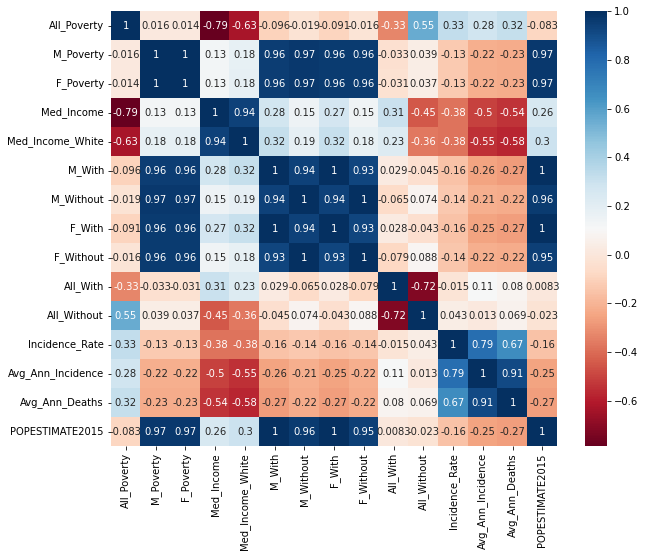

In [60]:
corr_x = x_variable.corr()
# print(corr_x )
plt.figure(figsize=(10,8))
sns.heatmap(corr_x, annot=True, cmap='RdBu')
plt.show

### 2.2 Selecting the most important features [10 Marks]
In this step, we want to remove the redundant features. 

*Hint*: This can be done by analyzing the correlation between the features and removing the highly correlated features. Remember, throughout the project, write down specific reasons for any desicion you make.

## **Part 3: Regression Model Construction [30 Marks]**

### 3.1 Splitting the dataset [5 Marks] 

Split the dataset to three parts: train, validation, and test. You choose the ratios for the three datasets and provide a one-sentence rationale on why you went with such ratios.

*Hint*: You can use the validation set approach from ch5 lab (google colab).

In [61]:
# Choose the data we need for the regression modell construction
data = df4[['Mortality_Rate', 'All_Poverty', 'M_Poverty', 'F_Poverty', 'Med_Income', 'Med_Income_White', 'M_With', 'M_Without', 'F_With', 'F_Without', 'All_With', 'All_Without', 'Incidence_Rate', 'Avg_Ann_Incidence', 'Avg_Ann_Deaths', 'POPESTIMATE2015']]

# # sklearn
# from sklearn.model_selection import train_test_split
# # Split the data into the features (x) and the target (y)
# x = data.iloc[:, 1:]
# y = data.iloc[:, 0]
# # Separate the data into the test (hold-out) set and accessible data (train set plus validation set)
# x_accessible, x_test, y_accessible, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# # Separate the accessible dataset into the train set and validation set
# x_train, x_val, y_train, y_val = train_test_split(x_accessible, y_accessible, test_size=0.25, random_state=0)

In [62]:
# Shuffle the dataset and reset the index
data = data.sample(frac=1).reset_index(drop=True)
# Split the data into 60%, 20%, 20%, for training, validation, and test datasets respectively
# Separate the last 20% as hold-out data (test data)
data_test=data[int(0.8*len(data)):len(data)]
# Keep the first 80% as accessible dataset (training+validation data)
data_accessible=data[0:int(0.8*len(data))]
# Randomly select 1/4 of the accessible samples as training data (75% of the total samples)
np.random.seed(1)
train = np.random.choice(data_accessible.shape[0], int(0.75*data_accessible.shape[0]), replace=False)
len(train)

1584

In [63]:
# Create a binary indicator for samples that are selected for training
select = np.in1d(range(data_accessible.shape[0]), data_train)
len(select)

2112

In [64]:
data_train = data_accessible[select]
data_validation = data_accessible[~select]

### 3.2 Model training [15 Marks]
Create three different models, using different features (and optionally nonlinear transformations). The purpose of these models is to predict mortality rate of lung cancer with reasonably high R2 (at least exceeding 70%) using a carefully chosen and justified set of features. Use the visualizations from section 2.1 to inform the feature selection for each model.

In [65]:
lm = smf.ols('Mortality_Rate~All_Poverty + Med_Income + All_With + Incidence_Rate', data =data_train ).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Mortality_Rate   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     1414.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:01:13   Log-Likelihood:                -5225.0
No. Observations:                1584   AIC:                         1.046e+04
Df Residuals:                    1579   BIC:                         1.049e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         13.4019      2.890      4.637      0.000       7.733      19.071
All_Poverty      7.99e-05   4.39e-05      1.818      0.069    -6.3e-06       0.000
Med_Income        -0.0001   2.13e-05     -5.431      0.000      -0.000    -7.4e-05
All_With       -8.978e-06   2.78e-05     -0.323      0.747   -6.35e-05    4.55e-05
Incidence_Rate     0.6426      0.010     64.079      0.000       0.623       0.662
==============================================================================
Omnibus:                      229.925   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2100.052
Skew:                          -0.360   Prob(JB):                         0.00
Kurtosis:                       8.595   Cond. No.                     1.72e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# preds = lm.predict(Auto)
# square_error = (Auto['mpg'] - preds)**2
# print('--------Validation MSE for linear regression model--------')
# print('Mean:',np.mean(square_error[~select]))
# print('Standard deviation:',np.std(square_error[~select]))

### 3.3 Model selection [10 Marks]
Using different model selection criteria and validation dataset, choose the single best perfoming model among the three models.

## **Part 4: Model diagnostics [10 marks]**
Explore model collinearity with `variance_inflation_factor`. Larger values of VIF indicate multicollinearity. Remove the problematic features and refit the model. Report how model R-squared is affected.

*Hint:* Consider VIF > 10 as an indicator of multicollinearity. If the VIF for all your features is below 10, it is a positive indication that the level of collinearity is acceptably low without any changes to the model needed in this step.

## **Part 5: Reporting test performance [5 marks]**
Report the MSE of the final regression model using the test set.

## **Part 6: Alternative predictive model (optional): [20 bonus points up to the maximum mark]**

Use one other supervised learning model to outperform the regression model from part 5 (in terms of MSE) on the same hold-out test set. Document, justify, and explain all your decision w.r.t. the implementation of this alternative predictive model.

This part is deliberately designed without clear instructions as bonus points for efforts of groups in completing a very common ML task without a walkthrough or instrcutions.